In [32]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [11]:
x,y= make_regression(n_samples=500, n_features=1, noise=20,random_state=2)

In [12]:
x.shape,y.shape

((500, 1), (500,))

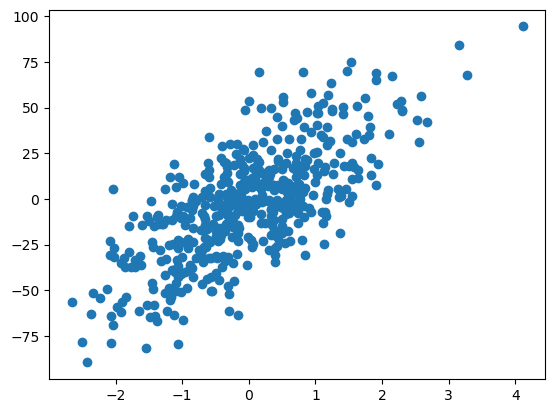

In [13]:
plt.scatter(x,y)

In [14]:
lr=LinearRegression()
lr.fit(x,y)
lr.coef_,lr.intercept_

(array([21.06543224]), -2.3099300306114734)

In [22]:
rr= Ridge(alpha=10)
rr.fit(x,y)
rr.coef_,rr.intercept_

(array([20.67708461]), -2.3161488572664934)

In [23]:
rr1= Ridge(alpha=100)
rr1.fit(x,y)
rr1.coef_,rr1.intercept_

(array([17.73460004]), -2.363268499514944)

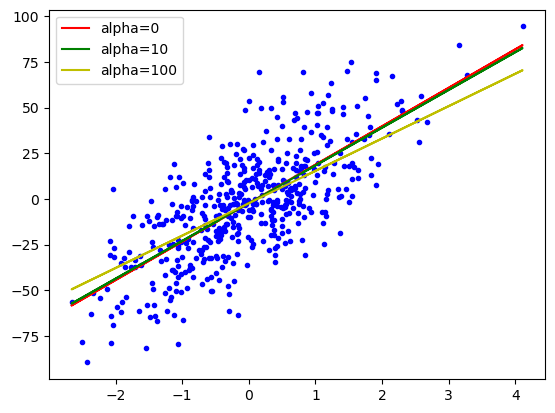

In [26]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),'r-',label='alpha=0')
plt.plot(x,rr.predict(x),'g-',label='alpha=10')
plt.plot(x,rr1.predict(x),'y-',label='alpha=100')
plt.legend()

##### Clearly we can see in above graph increasing the lambda, slope is decreasing.

## For 2d data

In [29]:
class ridge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,x,y):
      num=0
      den=0
      for i in range(x.shape[0]):
        num= num + (x[i]-x.mean())*(y[i]-y.mean())
        den= den + (x[i]-x.mean())**2
      self.m= num/(den+self.alpha)
      self.b= y.mean()-self.m*x.mean()
      print(self.m,self.b)
    def predict(self,x):
        return self.m*x+self.b

In [31]:
rr2=ridge(alpha=10)
rr3= ridge(alpha=100)
rr2.fit(x,y),rr3.fit(x,y)

[20.67708461] [-2.31614886]
[17.73460004] [-2.3632685]


(None, None)

## for nd-data

In [74]:
from sklearn.datasets import load_diabetes
x,y= load_diabetes(return_X_y=True)

In [75]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
rr= Ridge(alpha=0.1,solver='sag')
rr.fit(x_train,y_train)
rr.predict(x_test)
r2_score(y_test,rr.predict(x_test))

0.45199404142129496

In [58]:
rr.coef_,rr.intercept_

(array([   6.65590328, -172.22934159,  485.53423142,  314.66375265,
         -72.9450194 ,  -80.59972043, -174.45846574,   83.60647454,
         484.35924175,   73.58726527]),
 151.9254267090063)

In [59]:
x_train.shape,y_train.shape
np.dot(x.T,x).shape

(10, 10)

In [70]:
class RIDGE:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    # w= (x.t*x + alpha*i)^-1 * x.t*y
    def fit(self,x,y):
        x= np.insert(x,0,1,axis=1)
        i= np.identity(x.shape[1])
        i[0][0]=0
        result = np.linalg.inv(x.T.dot(x)+self.alpha*i).dot(x.T).dot(y)
        self.m=result[1:]
        self.b=result[0]
        print(self.m,self.b)
    def predict(self,x_test):
        return np.dot(x_test,self.m)+self.b

In [71]:
reg= RIDGE(alpha=0.1)
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
r2_score(y_test,y_pred)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056] 151.9254685690099


0.45199494197195456

### Using gradient-descent

In [76]:
class gradient_ridge:
    def __init__(self,alpha=0.1,lr=0.01,epoch=100):
     self.alpha=alpha
     self.lr=lr
     self.epoch=epoch
     self.m=None
     self.b=None
    def fit(self,x,y):
       self.m= np.ones(x.shape[1])
       self.b=1
       w= np.insert(self.m,0,self.b)
       x= np.insert(x,0,1,axis=1)
       for i in range(self.epoch):
         w= w - self.lr*(x.T.dot(x.dot(w)-y)+self.alpha*w)
       self.b=w[0]
       self.m=w[1:]
       print(self.m,self.b)
    def predict(self,x_test):
        return np.dot(x_test,self.m)+self.b

In [81]:
gr= gradient_ridge(alpha=0.010,lr=0.005,epoch=500)
gr.fit(x_train,y_train)
y_pred= gr.predict(x_test)
r2_score(y_test,y_pred)

[  20.01313345 -161.13821382  475.98022543  316.1171764   -33.20441666
 -107.17679842 -192.94348889  107.05613312  434.39098438  103.72465758] 152.0249669567676


0.4541139756030417